# Wei (Will) Jiang, Python3

## Question 1

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('http://people.stern.nyu.edu/vt527/perf.data', sep=',',header=None)

## Question 2

In [3]:
df.head(10) #preview 10 rows

,0,1,2,3,4,5
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
5,2,23,3,1,20,3
6,2,9,5,2,19,3
7,2,10,3,2,27,3
8,1,22,3,1,58,3
9,2,15,3,1,20,3


In [4]:
df.shape #151 obsevations and 6 columns

(151, 6)

In [5]:
col_names = ['F1','F2','F3','F4','F5','F6'] #name the colums
df.columns = col_names

In [6]:
df.head(10)

,F1,F2,F3,F4,F5,F6
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
5,2,23,3,1,20,3
6,2,9,5,2,19,3
7,2,10,3,2,27,3
8,1,22,3,1,58,3
9,2,15,3,1,20,3


In [7]:
df.describe() #display summary statistics

,F1,F2,F3,F4,F5,F6
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [8]:
df['F6'].value_counts()

3    52
2    50
1    49
Name: F6, dtype: int64

In [9]:
df['F2'] = df['F2'].replace(2,'')

In [10]:
df['F2'].fillna(df['F2'].mode()[0],inplace=True)

## Question 3

In [11]:
def high_test(x):
    if x == 1: return 0
    elif x == 2: return 0
    else: return 1

In [12]:
df['F6'] = df['F6'].apply(high_test)

In [13]:
df['F6'].value_counts()

0    99
1    52
Name: F6, dtype: int64

In [14]:
df.head(10)

,F1,F2,F3,F4,F5,F6
0,1,23,3,1,19,1
1,2,15,3,1,17,1
2,1,23,3,2,49,1
3,1,5,2,2,33,1
4,2,7,11,2,55,1
5,2,23,3,1,20,1
6,2,9,5,2,19,1
7,2,10,3,2,27,1
8,1,22,3,1,58,1
9,2,15,3,1,20,1


In [15]:
df1 = df.copy()
df1 = df1.loc[:, [x for x in df1.columns]] #surpervisor is categorical and should be transform to dummy variables
df1 = pd.get_dummies(df1, drop_first = True)
df1.columns

Index(['F1', 'F3', 'F4', 'F5', 'F6', 'F2_3', 'F2_4', 'F2_5', 'F2_6', 'F2_7',
       'F2_8', 'F2_9', 'F2_10', 'F2_11', 'F2_12', 'F2_13', 'F2_14', 'F2_15',
       'F2_16', 'F2_17', 'F2_18', 'F2_19', 'F2_20', 'F2_21', 'F2_22', 'F2_23',
       'F2_24', 'F2_25', 'F2_'],
      dtype='object')

In [16]:
X = df1.drop('F6', axis=1)
y = df1.F6

In [17]:
X.head()

,F1,F3,F4,F5,F2_3,F2_4,F2_5,F2_6,F2_7,F2_8,...,F2_17,F2_18,F2_19,F2_20,F2_21,F2_22,F2_23,F2_24,F2_25,F2_
0,1,3,1,19,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,3,1,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,2,49,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,2,2,33,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,11,2,55,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: F6, dtype: int64

## Question 4

In [19]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,ShuffleSplit,KFold,cross_val_score,GridSearchCV,learning_curve,validation_curve
from sklearn.metrics import roc_curve, auc,plot_confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14, test_size =0.3)

In [21]:
# model training
tree_clf1 = DecisionTreeClassifier(max_depth=None, criterion='entropy')
tree_clf1= tree_clf1.fit(X_train, y_train)

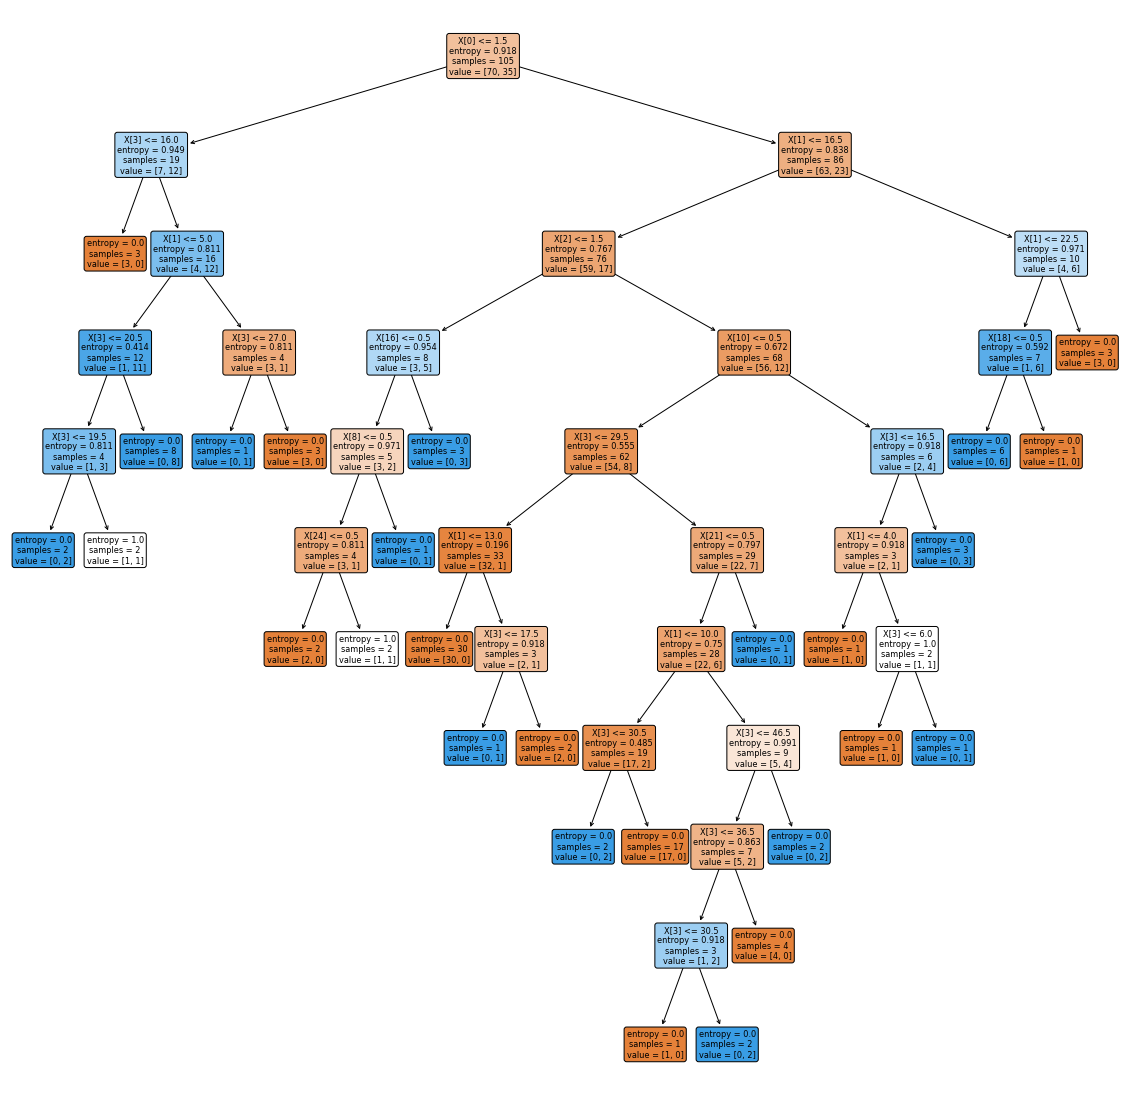

In [24]:
# plot decision tree
fig1 = plt.figure(1,figsize=(20,20))
plot_tree(tree_clf1,
          rounded = True,
          filled = True)
plt.show()

In [25]:
y_pred = tree_clf1.fit(X_train, y_train).predict(X_test)
print('f1 score is :',f1_score(y_test, y_pred))
print('accuracy score is :',accuracy_score(y_test, y_pred))

f1 score is : 0.5555555555555555
accuracy score is : 0.6521739130434783


## Question 5

In [27]:
#train the logistic regression model
logistic = LogisticRegression(C=100,penalty='l2')
logistic = logistic.fit(X_train, y_train)
print('The weights of the attributes are:', logistic.coef_)

The weights of the attributes are: [[-1.32734884  0.15763191 -1.73326386  0.06260955 -1.48822563 -1.78405885
   0.98485772  0.60575741  0.51693667  1.59356109  4.29716568  2.7668898
  -1.60498126 -1.93373414  1.86356653 -0.77213368  2.04863917 -2.36304565
  -1.03296596  0.64056279 -0.49335368  1.52688704 -1.95931187  0.46538971
   1.85879465 -3.1729561  -2.0458777  -2.14787818]]


C:\Users\Will Jiang\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
y_pred = tree_clf1.fit(X_train, y_train).predict(X_test)
print('f1 score is :',f1_score(y_test, y_pred))
print('accuracy score is :',accuracy_score(y_test, y_pred))

f1 score is : 0.5555555555555555
accuracy score is : 0.6521739130434783


## Question 6

In [31]:
#train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)

In [32]:
y_pred = tree_clf1.fit(X_train, y_train).predict(X_test)
print('f1 score is :',f1_score(y_test, y_pred))
print('accuracy score is :',accuracy_score(y_test, y_pred))

f1 score is : 0.5555555555555555
accuracy score is : 0.6521739130434783


## Question 7

In [ ]:
#Optimal models above
best_lr = gs_lr.best_estimator_
best_tree = gs_tree.best_estimator_
best_knn = gs_knn.best_estimator_

#Label the classifiers
clf_labels = ['Logistic regression', 'Decision tree', 'kNN']
all_clf = [best_lr, best_tree, best_knn]

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 14)

In [ ]:
#Estimate AUC based on cross validation
print('10-fold cross validation:\n')
for clf, label in zip(all_clf, clf_labels): 
    scores = cross_val_score(estimator=clf,
                             X=X,
                             y=y,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

#Visualization
colors = [ 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], #random guess
         linestyle='--',
         color='gray',
         linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()

## Question 8

In [ ]:
#Decision Tree Parameter Tuning
params_tree = {
    'max_depth': range(1,20),
    'criterion':['gini','entropy'],
    'min_samples_leaf':range(1,10),
    'min_samples_split':range(0,10)
}

gs_tree = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                       param_grid=params_tree,
                       scoring='f1',
                       cv=inner_cv,
                       n_jobs=-1) #use all core to run codes

gs_tree = gs_tree.fit(X,y)
print("Parameter Tuning #1")
print("Non-nested CV F1: ", gs_tree.best_score_)
print("Optimal Parameter: ", gs_tree.best_params_)
print("Optimal Estimator: ", gs_tree.best_estimator_)

NCV_gs_tree = cross_val_score(gs_tree, X=X, y=y, scoring='f1', cv=outer_cv)
print("Nested CV F1: ",NCV_gs_tree.mean(), " +/- ", NCV_gs_tree.std())

## Question 9

In [ ]:
#Logistic Regression Parameter Tuning
param_lr = {
    'C':10.0**np.arange(-5,6,1), #use = 10.0 rather than 10
    'penalty':['l1','l2']
}

gs_lr = GridSearchCV(estimator=LogisticRegression(random_state=42, solver = 'liblinear'), #For small datasets, ‘liblinear’ is a good choice
                  param_grid=param_lr,
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=-1)

gs_lr = gs_lr.fit(X,y)
print("Parameter Tuning #2")
print("Non-nested CV F1: ", gs_lr.best_score_)
print("Optimal Parameter: ", gs_lr.best_params_)
print("Optimal Estimator: ", gs_lr.best_estimator_)

NCV_gs_lr = cross_val_score(gs_lr, X=X, y=y, scoring='f1', cv=outer_cv)
print("Nested CV F1:",NCV_gs_lr.mean(), " +/- ", NCV_gs_lr.std())

## question 10

In [ ]:
#KNN Parameter Tuning

#Normalize Data
pipe = Pipeline([
        ('sc', StandardScaler()),     
        ('knn', KNeighborsClassifier())])

#Parameters to optimize
param_knn = {
        'knn__n_neighbors': np.arange(1,30,2),
        'knn__weights': ['uniform', 'distance']
    }

gs_knn = GridSearchCV(estimator=pipe,
                  param_grid=param_knn,
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=-1)

gs_knn = gs_knn.fit(X,y) 
print("Parameter Tuning #3")
print("Non-nested CV F1: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_)

NCV_gs_knn = cross_val_score(gs_knn, X=X, y=y, scoring='f1', cv=outer_cv)
print("Nested CV F1: ",NCV_gs_knn.mean(), " +/- ", NCV_gs_knn.std())